In [15]:
import scipy
from scipy.stats import chi2
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from icecream import ic


# 1. Write a program implementing a linear congruential generator

Write a program implementing a linear congruential generator (LCG). Be sure that the program works correctly using only integer representation.

In [47]:
def congruential_generator(X_0, alpha, c, M, N):
    random_numbers = []
    random_numbers.append(X_0)
    for i in range(N):
        X_n = (alpha * random_numbers[-1] + c) % M
        random_numbers.append(X_n)
    return np.array(random_numbers[1:])

#congruental_output = congruential_generator(X_0=3, alpha=129, c=26401, M=6536, N=10000)
congruental_output = congruential_generator(X_0=3, alpha=75, c=74, M=2**16+1, N=10000)
congruental_output_2 = congruential_generator(X_0=3, alpha=5, c=1, M=16, N=10000)


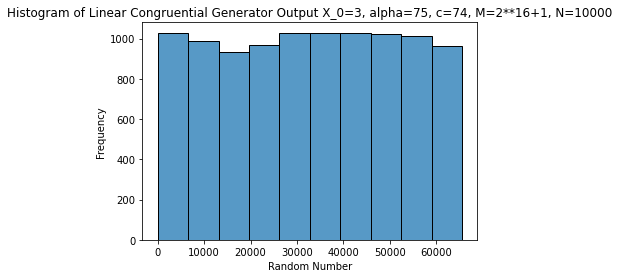

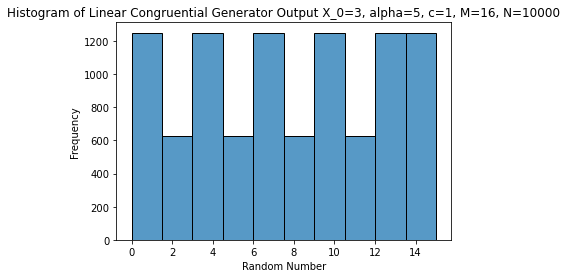

In [51]:
# Plot the histogram
sns.histplot(congruental_output, bins=10, kde=False)
plt.xlabel('Random Number')
plt.ylabel('Frequency')
plt.title('Histogram of Linear Congruential Generator Output X_0=3, alpha=75, c=74, M=2**16+1, N=10000')
plt.show()

sns.histplot(congruental_output_2, bins=10, kde=False)
plt.xlabel('Random Number')
plt.ylabel('Frequency')
plt.title('Histogram of Linear Congruential Generator Output X_0=3, alpha=5, c=1, M=16, N=10000')
plt.show()


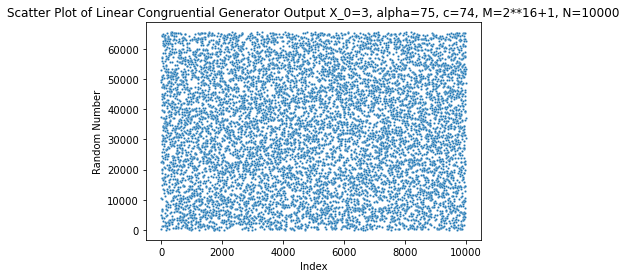

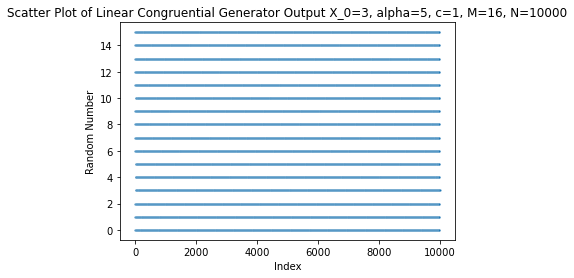

In [53]:
# Create indices for the scatter plot
indices = np.arange(1, len(congruental_output) + 1)
indices_2 = np.arange(1, len(congruental_output_2) + 1)

# Plot the scatter plot
sns.scatterplot(x=indices, y=congruental_output, s=5)
plt.xlabel('Index')
plt.ylabel('Random Number')
plt.title('Scatter Plot of Linear Congruential Generator Output X_0=3, alpha=75, c=74, M=2**16+1, N=10000')
plt.show()

# Plot the scatter plot
sns.scatterplot(x=indices_2, y=congruental_output_2, s=5)
plt.xlabel('Index')
plt.ylabel('Random Number')
plt.title('Scatter Plot of Linear Congruential Generator Output X_0=3, alpha=5, c=1, M=16, N=10000')
plt.show()

### Conclusion: 
As can be visually assessed, the random number generator with parameters  X_0=3, alpha=75, c=74, M=2**16+1 seem to be more true random (scatter plot is more random and the histogram more even) compared to X_0=3, alpha=5, c=1, M=16, which show clear systematical arranging of the 'random numbers' in both the scatter plot and histogram.
The quality of  X_0=3, alpha=75, c=74, M=2**16+1 is further accessed with tests as described in (b).

### (b) Evaluate the quality of the generator by graphical descriptive statistics (histogrammes, scatter plots) and statistical tests- χ2,Kolmogorov-Smirnov, run-tests, and correlation test.

## Chi Squared Test

In [61]:
# BIN THE OBSERVATIONS
classes = 10 
# Compute the histogram for the observed data
observed, bin_edges = np.histogram(congruental_output, bins=classes)
#observed_2, bin_edges_2 = np.histogram(congruental_output_2, bins=classes)

# Compute the expected frequencies assuming uniform distribution over the same range
total_count = len(congruental_output)
expected = np.ones(classes)*10000/classes

print(observed)
#print(observed_2)
print(expected)


[1027  988  932  970 1029 1029 1028 1021 1015  961]
[1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]


In [62]:
# Define the test statistic function
def test_statistic(observed, expected):
    T = 0
    for o, e in zip(observed, expected):
        T += ((o - e) ** 2) / e
    return T


# Calculate the test statistic
test_statistic_value = test_statistic(observed, expected)
print("Test Statistic:", test_statistic_value)


Test Statistic: 11.05


In [63]:

# Define the chi-squared p-value function
def chi_squared_p_value(test_statistic, degrees_of_freedom):
    p_value = chi2.sf(test_statistic, degrees_of_freedom)
    return p_value

# Calculate the p-value
degrees_of_freedom = classes - 1
p_value = chi_squared_p_value(test_statistic_value, degrees_of_freedom)
print("P-Value:", p_value)

P-Value: 0.27229726110646846


# Kolmogorov-Smirnov test


K-S Statistic: 0.009919070143583064


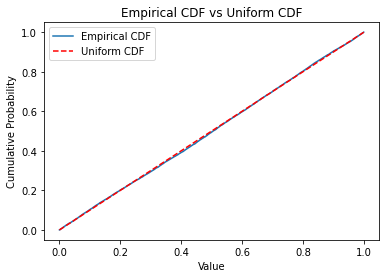

In [80]:
# Kolmogorov-Smirnov test

M = 2**16+1 #congruental_output

def empirical_cdf(data):
    sorted_data = np.sort(data)
    n = len(data)
    ecdf = np.arange(1, n + 1) / n
    return sorted_data, ecdf

def theoretical_cdf_uniform(data):
    return data

def ks_statistic(empirical_cdf_values, theoretical_cdf_values):
    return np.max(np.abs(empirical_cdf_values - theoretical_cdf_values))

normalized_random_numbers = np.array(congruental_output) / M

# Calculate empirical CDF
sorted_data, ecdf = empirical_cdf(normalized_random_numbers)

# Calculate theoretical CDF for the uniform distribution
tcdf = theoretical_cdf_uniform(sorted_data)

# Compute the K-S statistic
ks_stat = ks_statistic(ecdf, tcdf)

# Print results
print(f'K-S Statistic: {ks_stat}')


# Plotting the empirical CDF and the uniform CDF
plt.step(sorted_data, ecdf, where='post', label='Empirical CDF')
plt.plot([0, 1], [0, 1], 'r--', label='Uniform CDF')
plt.xlabel('Value')
plt.ylabel('Cumulative Probability')
plt.title('Empirical CDF vs Uniform CDF')
plt.legend()
plt.show()

# Run Test 

In [66]:
median = np.median(congruental_output)
ic(median)

n1 = sum(congruental_output > median) 
n2 = sum(congruental_output < median)
ic(n1)
ic(n2)


# Calculate number of runs
prev = None
pos_runs = 0
neg_runs = 0

for num in congruental_output:
    if num > median:
        if prev is None or prev <= median:
            pos_runs += 1
        prev = num
    elif num < median:
        if prev is None or prev >= median:
            neg_runs += 1
        prev = num

print("Positive runs:", pos_runs)
print("Negative runs:", neg_runs)

T = pos_runs + neg_runs
ic(T)
    

ic| median: 33072.0
ic| n1: 5000
ic| n2: 5000
ic| T: 5074


Positive runs: 2537
Negative runs: 2537


5074

# Pearson correlation coefficient (PCC)

In [72]:
# Peasons correlation coefficient

def autocorr_lag1(x):
    # Compute autocorrelation at lag 1
    autocorr = np.corrcoef(x[:-1], x[1:])[0, 1]
    return autocorr

print(autocorr_lag1(congruental_output)) #almost no correlation with previous num 

-0.00228606318941299
0.27047808777637755


# Repeat (a) and (b) by experimenting with different values of “a”, “b” and “M”. In the end you should have a decent generator. Report at least one bad and your final choice.
The rng has been tested with two different set of values as follows:

congruental_output = congruential_generator(X_0=3, alpha=75, c=74, M=2**16+1, N=10000)
congruental_output_2 = congruential_generator(X_0=3, alpha=5, c=1, M=16, N=10000)


# 2. Apply a system available generator and perform the various statistical tests you did under Part 1 point (b) for this generator too

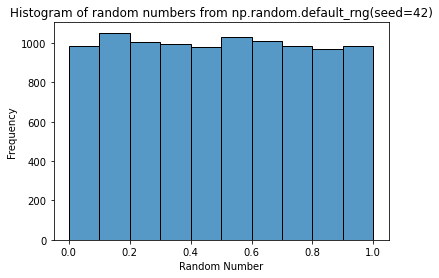

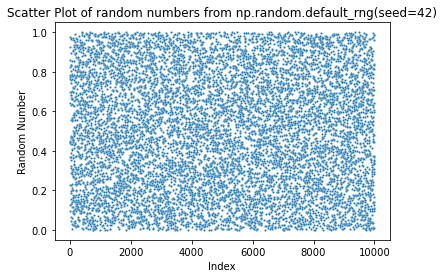

In [79]:
rng = np.random.default_rng(seed=42)
random_numbers = rng.random(10000)

# Plot the histogram
sns.histplot(random_numbers, bins=10, kde=False)
plt.xlabel('Random Number')
plt.ylabel('Frequency')
plt.title('Histogram of random numbers from np.random.default_rng(seed=42)')
plt.show()

indices_3 = np.arange(1, len(random_numbers) + 1)

# Plot the scatter plot
sns.scatterplot(x=indices_3, y=random_numbers, s=5)
plt.xlabel('Index')
plt.ylabel('Random Number')
plt.title('Scatter Plot of random numbers from np.random.default_rng(seed=42)')
plt.show()


The above tests has been run for the np.random.default_rng(seed=42), which performs better at generating random numbers than our implemented rng (as expected).

Chi Squared Test: 
Test statistic: 5.9
P-value: 0.75

Kolmonogorov-Smirnov test:
K-S Statistic: 0.007441184882868157

Run test 1:
median: 33072.0
n1: 5000
n2: 5000
T (positive runs + neg trun): 5074
Positive runs: 2537
Negative runs: 2537

Pearson correlation coefficient (PCC): 0.004108


# 3. You were asked to simulate one sample and perform tests on this sample. Discuss the sufficiency of this approach and take action, if needed.

Simulating on one sample can provide some insights into the quality of the number generator, which is useful when testing for different parameters as we did in part two. However, a single sample might not capture the full behavior of the generator, and multiple samples could provide insight into the generators overall performance. In order to optimize our testing of the rngs, we could generate multiple samples to test on and take the mean variance of the different runs to get a higher quality of the test metrics.

